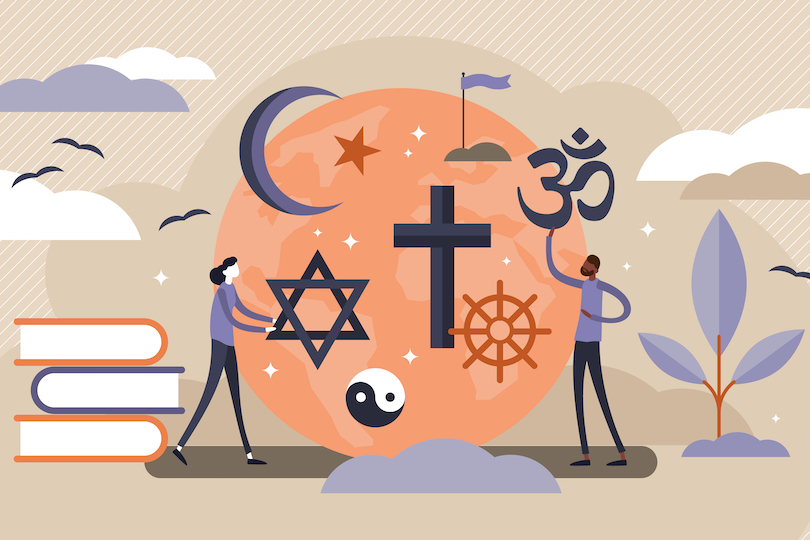

# Religion in Philosophy

Throughout history, humanity's relationship with religion and different belief systems has been a core part of our internal conflict and identity. As a concept that is typically less immediately physical but more relevant to us spiritually and mentally, it is only natural to find value in looking at religion through philisophical schools throughout time. Not only do they often address religion and humanity's relationship with religion on its own, religion is intrinsically connected to and can shape our values, so a school of thought's perspective on religion can unveil other aspects of the school.

In this data analysis project, we take a look at an extensive collection of philisophical text data which span 13 schools of thought. Specifically, we have Plato, Aristotle, Nietzsche, Rationalism, Empiricism, German Idealism, Communism, Capitalism, Phenomenology, Continental Philosophy, Analytic Philosophy, Feminism, and Stoicism. Through this data, we will look at how these schools view religion and analyze their sentiment. We will aim to answer questions about the extent of their sentiment on religion and their perspective on it. 

## Housekeeping

We first install some immediately relevant libraries, observe current Python version, and read the data into the notebook. Jump to "Preliminary Data Exploration" to see actual observations of the philosophy data. 

In [8]:
import sys
import numpy as np
import pandas as pd

In [2]:
print(sys.version)

3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]


In [15]:
path = '../../../../Downloads/philosophy_data.csv' #alter path for own dataset file path
phi_data = pd.read_csv(path) 

In [53]:
pd.options.display.max_colwidth = 75
phi_data.sample(3)

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
236863,Being And Time,Heidegger,phenomenology,"In that Dasein essentially is its disclosedness, and, as disclosed, dis...","In that Dasein essentially is its disclosedness, and, as disclosed, dis...",1927,1996,116,"in that dasein essentially is its disclosedness, and, as disclosed, dis...","['in', 'that', 'dasein', 'essentially', 'is', 'its', 'disclosedness', '...","in that Dasein essentially be -PRON- disclosedness , and , as disclose..."
277655,Science Of Logic,Hegel,german_idealism,This is a relapse that gives rise to the progression to bad infinity.,This is a relapse that gives rise to the progression to bad infinity.,1817,2010,69,this is a relapse that gives rise to the progression to bad infinity.,"['this', 'is', 'relapse', 'that', 'gives', 'rise', 'to', 'the', 'progre...",this be a relapse that give rise to the progression to bad infinity .
242144,Off The Beaten Track,Heidegger,phenomenology,the relation to unconcealment.,the relation to unconcealment.,1950,2001,30,the relation to unconcealment.,"['the', 'relation', 'to', 'unconcealment']",the relation to unconcealment .


# Preliminary Data Exploration

To explain and prepare for potential issues to come for this analysis, we first explore the data and display information which is relevant to future analysis.

To analyze these philosophical texts, it would help to get a clear picture in how many sentences from each school we have to work with. This way, it will be easier to determine whether we have enough data can come to any conclusions about specific schools relative to other schools.

In [14]:
phi_data.loc[:,"school"].value_counts()

analytic           55425
aristotle          48779
german_idealism    42136
plato              38366
continental        33779
phenomenology      28573
rationalism        22949
empiricism         19931
feminism           18635
capitalism         18194
communism          17958
nietzsche          13548
stoicism            2535
Name: school, dtype: int64

As we can see, each school has at least 10,000 sentences except for stoicism, which has 2,535. For the most part, there is a lot of data to work with for each school. However, we must take care when considering analysis for stoicism because of its relative lack of data.

In [19]:
print(phi_data.loc[1,["sentence_length","sentence_str"]])

sentence_length                                                                       69
sentence_str       Surely you are not prosecuting anyone before the king archon as I am?
Name: 1, dtype: object


Possible questions:
- common topics of interest for schools of thought
- positive/negative expression and viewpoint of the world
- which schools are similar to which/ which conflict the most
- opinions shift over time
- perspective on religion https://realpython.com/python-nltk-sentiment-analysis/
    - average american value is closest to which (in addition to capitalism)
    - word cloud to visualize common connected words

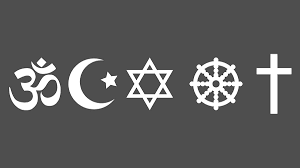

# Observing schools' relationship with religion

Now we properly assess the schools of though in regards to religion. We will do so in 2 ways:
* run a sentiment analysis on a subset of schools to determine how positive or negative they perceive religion
* we construct word clouds from sentences surrounding religion to determine the most common language and perspectives they use in relation

## How positive or negative do these schools perceive religion and religion-adjacent concepts?

To hone in on schools of interest, we will only look at a subset of the options for schools of thought. Specifically, I have selected Feminism, Capitalism, Communism, Nietzshe, Analytical Philosophy, and Continental Philosophy. I chose the first three because they are the most well-known and relevant schools among the modern population, especially those who are not familiar with philosophy. Nietzshe is very famously known as an atheist and preaches as such, so it would be good to see how this assessment views Nietzshe in sentiment relative to the other schools. Finally, Analytical and Continental Philosophies are often pitted against one another and immediately conflict, so there is the interest in seeing the contrast between their perspectives on religion. 

In [91]:
import nltk

In [121]:
nltk.download(['stopwords','vader_lexicon']) #download aspects of nltk needed for cleaning and analysis
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukearceneaux/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lukearceneaux/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In order to analyze the most commonly used words around religion for each school, we remove stop words, or common words and characters which don't alter meaning in a sentence (e.g. at, to) and turn the table of sentences into a long list of all of the words in the sentences in order. 

In [143]:
stop_words = set(stopwords.words('english')+['-pron-',',','.',';',':','?','!','-','--'])

In [145]:
def concat_clean_words(school): #returns list of words from specified school in order
    cond = phi_data.loc[:,'school'] == school
    text = ' '.join(phi_data.loc[cond,'lemmatized_str']) #lemmatized for word cloud later
    text_tokens = text.split()
    return [word.lower() for word in text_tokens if word.lower() not in stop_words]

Using the function to retrieve that long list of words, now we create a function to apply sentiment analysis on that list and retrieve an average sentiment for words surrounding any specified topic. In this case, we are most interested in religion and God. God is useful for this case as Christianity is by far the more prevalent religion throughout, so philisophical texts consistently address God from Christianity.

In [195]:
sia = SentimentIntensityAnalyzer()

def avg_sentiment_context(school,word): #returns average sentiment for context around specified word 
    text = nltk.Text(concat_clean_words(school))
    conc_list = text.concordance_list(word,lines = 500)
    neg,neu,pos = 0,0,0
    n = len(conc_list)
    for i in range(n):
        sent_score = sia.polarity_scores(conc_list[i].line)
        neg += sent_score['neg']
        neu += sent_score['neu']
        pos += sent_score['pos']
    return {'neg': neg/n, 'neu': neu/n, 'pos': pos/n}

We will use 'God' as our topic of interest for each school.

In [196]:
schools = ['feminism', 'capitalism', 'communism','nietzsche', 'analytic', 'continental']
neg_means = []
neu_means = []
pos_means = []
for school in schools:
    sent_dict = avg_sentiment_context(school,'God')
    neg_means.append(sent_dict['neg'])
    neu_means.append(sent_dict['neu'])
    pos_means.append(sent_dict['pos'])

We visualize the average sentiments using a bar graph. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

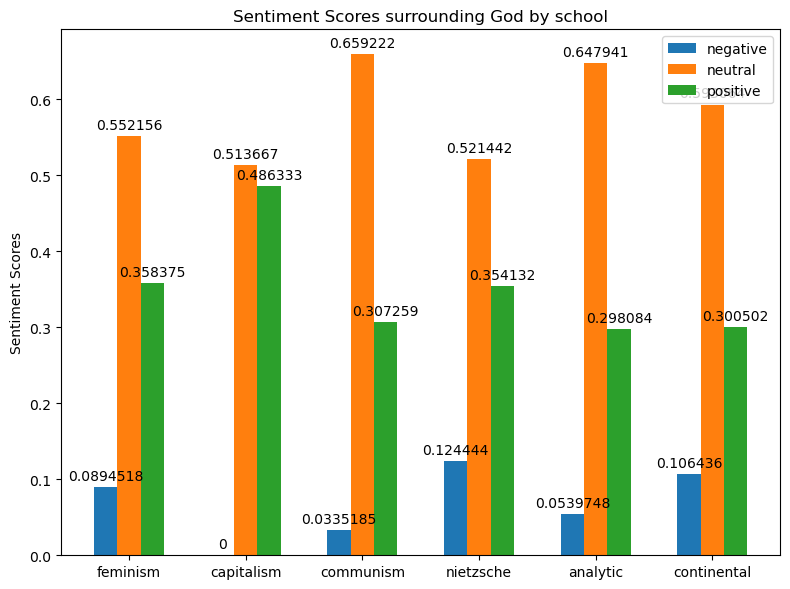

In [197]:
fig, ax = plt.subplots(figsize=(8,6))

x = np.arange(len(schools))
width = 0.2

rects1 = ax.bar(x - width, neg_means, width, label='negative')
rects2 = ax.bar(x, neu_means, width, label='neutral')
rects3 = ax.bar(x + width, pos_means, width, label='positive')

ax.set_ylabel('Sentiment Scores')
ax.set_title('Sentiment Scores surrounding God by school')
ax.set_xticks(x, schools)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

Off first glance, the average sentiment surrounding God is neutral. However, it seems the majority of the selected schools also discuss God in a positive light. This is most especially true for Capitalism. Our baseline for negative Nietzshe expectedly had the largest average negativity value with 0.124. Regarding schools of modern relevance, feminism had the highest negativity value at 0.089. We can hypothesize that this is due to the patriarchal stereotypes that religion (and in this case, Christianity) insist onto society directly conflict with many values within feminism. Continental Philosophy had double the negativity value of the Analytical Philosophy (which had a much higher neutral value). This could be due to it being less interested in analysis of thought and knowledge.

To be sure, we use 'religion' below to see if there are any differences in the schools' language.

In [199]:
neg_means = []
neu_means = []
pos_means = []
for school in schools:
    sent_dict = avg_sentiment_context(school,'religion')
    neg_means.append(sent_dict['neg'])
    neu_means.append(sent_dict['neu'])
    pos_means.append(sent_dict['pos'])

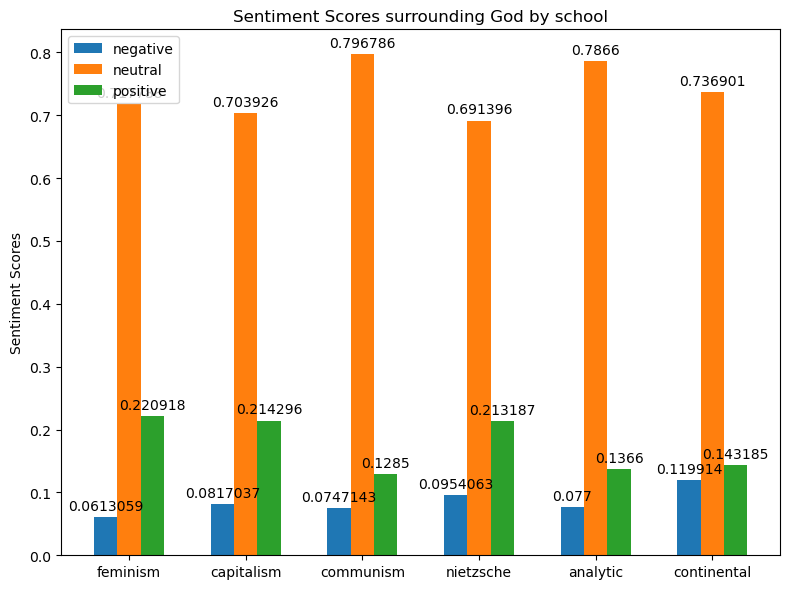

In [200]:
fig, ax = plt.subplots(figsize=(8,6))

x = np.arange(len(schools))
width = 0.2

rects1 = ax.bar(x - width, neg_means, width, label='negative')
rects2 = ax.bar(x, neu_means, width, label='neutral')
rects3 = ax.bar(x + width, pos_means, width, label='positive')

ax.set_ylabel('Sentiment Scores')
ax.set_title('Sentiment Scores surrounding God by school')
ax.set_xticks(x, schools)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

The neutral scores here are much higher in general. This could be because these texts discuss the word "religion" more often in more objective cases unrelated to their own schools of thought.

## What are the most common words these schools associate with God and religion?

We look at the same six schools here. Now we will create word clouds to visualize the most common words these texts associate with God. 